In [1]:
import torch

assert torch.cuda.is_available()

In [2]:
import os
from drugex.training.generators import SequenceRNN
from drugex.data.corpus.vocabulary import VocSmiles

MODELS_PR_PATH = "data/models/pretrained/smiles-rnn/Papyrus05.5_smiles_rnn_PT/"

voc = VocSmiles.fromFile(os.path.join(MODELS_PR_PATH, "Papyrus05.5_smiles_rnn_PT.vocab"), encode_frags=False)
pretrained = SequenceRNN(voc, is_lstm=True)
pretrained.loadStatesFromFile(os.path.join(MODELS_PR_PATH, "Papyrus05.5_smiles_rnn_PT.pkg"))

/home/sichom/software/miniconda/envs/8add-olomouc-sicho/lib/python3.12/site-packages/drugex/training/interfaces.py:322: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.lo

In [3]:
generated_pretrained = pretrained.generate(num_samples=1000)
generated_pretrained

Generating molecules:   0%|          | 0/1000 [00:00<?, ?it/s]

,SMILES,Valid
0,COc1ccc(Nc2ncc3ccc(-c4ccccc4OC)nc3n2)cn1,1.0
1,CC(Nc1nc(Cl)cc(N2C(=O)OCC2C(C)O)n1)c1cc(-c2ccc...,1.0
2,CC(C)N1CCC(NC(=O)c2csc(-c3[nH]nc4c3C(=O)N(CC3C...,1.0
3,Cn1nnc(-c2c(Cl)cc(Cl)cc2Br)n1,1.0
4,COc1ccc(C2=C(NC(=O)c3ccccc3)C(=O)c3ccccc3C2=O)cc1,1.0
...,...,...
995,CC(C(=O)N1CCC(O)(c2cc(F)cc(F)c2)CC1)n1nc(OCc2c...,1.0
996,COc1ccc2c(-c3c(C)n(C(C)(C)C)c4cc(C(=O)O)cnc34)...,1.0
997,COC(=O)C1(C)Cc2cc(C(F)(F)F)ccc2C1=O,1.0
998,O=[N+]([O-])c1ccc(CCN2CCCC2)cc1,1.0


In [4]:
import pandas as pd

generated_pretrained["Set"] = "Generated (pretrained)"
df_P08908 = pd.read_table("./data/data/P08908_LIGANDS_nostereo.tsv")
df_P08908["Set"] = "P08908"
df_all_sets = pd.concat([generated_pretrained, df_P08908])
df_all_sets.Set.unique()

array(['Generated (pretrained)', 'P08908'], dtype=object)

In [5]:
from qsprpred.data import MoleculeTable

mt_general_P08908 = MoleculeTable(
    name="Pretrained+P08908", 
    df=df_all_sets.copy()
)
len(mt_general_P08908)

4428

In [6]:
from qsprpred.data.descriptors.fingerprints import MorganFP

morgan_fp = MorganFP(3, 2048)
mt_general_P08908.addDescriptors([morgan_fp])
mt_general_P08908.getDescriptors().head()

,MorganFP_MorganFP_0,MorganFP_MorganFP_1,MorganFP_MorganFP_2,MorganFP_MorganFP_3,MorganFP_MorganFP_4,MorganFP_MorganFP_5,MorganFP_MorganFP_6,MorganFP_MorganFP_7,MorganFP_MorganFP_8,MorganFP_MorganFP_9,...,MorganFP_MorganFP_2038,MorganFP_MorganFP_2039,MorganFP_MorganFP_2040,MorganFP_MorganFP_2041,MorganFP_MorganFP_2042,MorganFP_MorganFP_2043,MorganFP_MorganFP_2044,MorganFP_MorganFP_2045,MorganFP_MorganFP_2046,MorganFP_MorganFP_2047
QSPRID,,,,,,,,,,,,,,,,,,,,,
Pretrained+P08908_0000,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Pretrained+P08908_0001,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Pretrained+P08908_0002,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Pretrained+P08908_0003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Pretrained+P08908_0004,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [7]:
from scaffviz.clustering.manifold import UMAP
from scaffviz.depiction.plot import Plot

plt = Plot(UMAP(n_neighbors=30, min_dist=0.4, metric="jaccard", random_state=42))
plt.plot(
    mt_general_P08908,
    color_by='Set',
    recalculate=True,
    port=9000,
    viewport_height=800
)

/home/sichom/software/miniconda/envs/8add-olomouc-sicho/lib/python3.12/site-packages/umap/umap_.py:1887: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/home/sichom/software/miniconda/envs/8add-olomouc-sicho/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Dash is running on http://127.0.0.1:9000/



In [8]:
from drugex.data.processing import Standardization

N_PROCESSES = 12 # number of CPU cores to use
CHUNK_SIZE = 1000 # largest chunk per CPU core (regulates RAM usage)

standardizer = Standardization(n_proc=N_PROCESSES, chunk_size=CHUNK_SIZE)
smiles_ft = standardizer.apply(df_P08908.SMILES)
smiles_ft[0:10]

Standardizing molecules (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

['O=C(NC1CCC(CCN2CCN(c3nsc4ccccc34)CC2)CC1)c1ccco1',
 'COc1ccc(CN2CC=C(c3c[nH]c4ccc(OC(C)C)cc34)CC2)cc1',
 'COc1ccccc1N1CCN(CCCCCN2C(=O)c3ccccc3S2(=O)=O)CC1',
 'Fc1ccc2c(C3CCC(N4CCN(c5cccc6[nH]ccc56)CC4)CC3)c[nH]c2c1',
 'O=S(=O)(c1cccc2ncccc12)N1CCCC1CCN1CCC(c2noc3cc(F)ccc23)CC1',
 'c1ccc(OCCNCC2CCOC(c3ccccc3)(c3ccccc3)O2)cc1',
 'COc1cccc(Sc2ccccc2N2CCNCC2)c1',
 'CC(C)Oc1ccccc1OCCNCc1cccc(C2CCCC2)c1',
 'O=C(NCCCCN1CCN(c2cccc(Cl)c2Cl)CC1)c1cc2ccc1CCc1ccc(cc1)CC2',
 'Cc1ccc2c(N3CCN(CCCc4cccc5c4OCC(=O)N5)CC3)cccc2n1']

In [13]:
from drugex.data.processing import CorpusEncoder, RandomTrainTestSplitter
from drugex.data.corpus.corpus import SequenceCorpus
from drugex.data.datasets import SmilesDataSet
from drugex.logs import logger
logger.setLevel('ERROR')

DATA_DIR = "data/datasets/encoded/rnn/"
os.makedirs(DATA_DIR, exist_ok=True)

voc = VocSmiles.fromFile(f"{MODELS_PR_PATH}/Papyrus05.5_smiles_rnn_PT.vocab", encode_frags=False)
encoder = CorpusEncoder( # CorpusEcoder uses the supplied corpus class to encode tokens for the new data set
    SequenceCorpus, # The corpus class implements how each SMILES string is divided into words by the vocabulary
    {
        # arguments of the SequenceCorpus
        'vocabulary': voc, # used vocabulary
        'update_voc': False, # if False, the vocabulary stays fixed (no new tokens are added to it)
        'throw': True # compounds containing unknown tokens are thrown out of the resulting data set

    },
    n_proc=N_PROCESSES,
    chunk_size=CHUNK_SIZE
)

data_collector = SmilesDataSet(os.path.join(DATA_DIR, 'ligand_corpus.tsv'), rewrite=True)
encoder.apply(smiles_ft, collector=data_collector)
data_collector

SequenceCorpus (batch processing):   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
pd.DataFrame(data_collector.getData()).sample(1000).to_csv(f"{DATA_DIR}_test_dummy.tsv", header=True, index=False, sep='\t')
data_set_test = SmilesDataSet(f"{DATA_DIR}_test_dummy.tsv", voc=voc)
data_set_test

In [23]:
from drugex.training.monitors import FileMonitor

MODEL_DIR = "data/models/finetuned/rnn"
BATCH_SIZE = 256

loader_train = data_collector.asDataLoader(batch_size=BATCH_SIZE)
loader_test = data_set_test.asDataLoader(batch_size=BATCH_SIZE)
ft_path = os.path.join(MODEL_DIR, 'P08908_finetuned')
finetuned = SequenceRNN(voc, is_lstm=True)
finetuned.loadStatesFromFile(os.path.join(MODELS_PR_PATH, 'Papyrus05.5_smiles_rnn_PT.pkg'))
monitor = FileMonitor(ft_path, save_smiles=True, reset_directory=True)
finetuned.fit(loader_train, loader_test, epochs=10, monitor=monitor, patience=30)
voc.toFile(os.path.join(MODEL_DIR, 'P08908_finetuned.vocab'))

/home/sichom/software/miniconda/envs/8add-olomouc-sicho/lib/python3.12/site-packages/drugex/training/interfaces.py:322: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Fitting model:   0%|          | 0/10 [00:00<?, ?it/s]

In [24]:
df_info = pd.read_csv(f'{MODEL_DIR}/P08908_finetuned_fit.tsv', sep='\t')
df_info.head()

,Epoch,loss_train,loss_valid,valid_ratio,best_epoch
0,1,1.200,1.035,0.604,1
1,2,0.241,0.234,0.346,2
2,3,0.183,0.170,0.594,3
3,4,0.161,0.145,0.672,4
4,5,0.139,0.131,0.699,5


<Axes: >

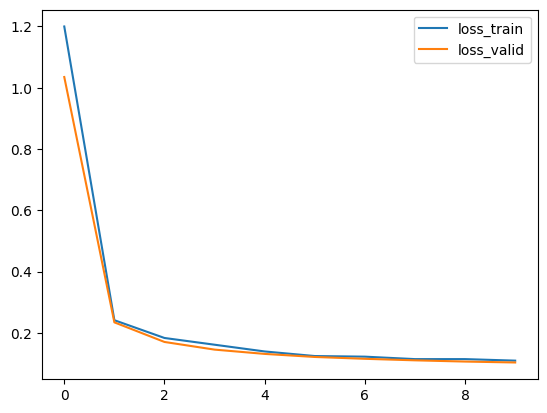

In [25]:
df_info[['loss_train', 'loss_valid']].plot.line()

In [26]:
df_finetuned = finetuned.generate(num_samples=1000)
df_finetuned["Set"] = "Fine-tuned"
df_all_sets = pd.concat([df_all_sets, df_finetuned])
df_all_sets.Set.unique()

Generating molecules:   0%|          | 0/1000 [00:00<?, ?it/s]

array(['Generated (pretrained)', 'P08908', 'Fine-tuned'], dtype=object)

In [28]:
mt_general_P08908_ft = MoleculeTable(
    name="Pretrained+P08908+FT", 
    df=df_all_sets.copy()
)
morgan_fp = MorganFP(3, 2048)
mt_general_P08908_ft.addDescriptors([morgan_fp])
plt = Plot(UMAP(n_neighbors=30, min_dist=0.4, metric="jaccard", random_state=42))
plt.plot(
    mt_general_P08908_ft,
    color_by='Set',
    recalculate=True,
    port=9001,
    viewport_height=800
)

/home/sichom/software/miniconda/envs/8add-olomouc-sicho/lib/python3.12/site-packages/umap/umap_.py:1887: UserWarning:

gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable

/home/sichom/software/miniconda/envs/8add-olomouc-sicho/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Dash is running on http://127.0.0.1:9001/



In [29]:
from qsprpred.models import QSPRModel

qsar_model = QSPRModel.fromFile("./data/models/qsar/P08908_LIGANDS_nostereo_XGBRegressor/P08908_LIGANDS_nostereo_XGBRegressor_meta.json")
qsar_model

In [30]:
predictions = qsar_model.predictMols(list(mt_general_P08908_ft.smiles))
predictions

array([[5.381205],
       [5.956837],
       [6.144106],
       ...,
       [7.041663],
       [7.761481],
       [6.458968]], dtype=float32)

In [31]:
mt_general_P08908_ft.addProperty(f"{qsar_model.name}_predictions", predictions)

In [34]:
plt.plot(
    mt_general_P08908_ft,
    color_by=f"{qsar_model.name}_predictions",
    recalculate=False,
    card_data=[
        "pchembl_value_Median"
    ],
    port=9001,
    viewport_height=800
)

Dash is running on http://127.0.0.1:9001/



---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
KeyError: 1



In [36]:
from drugex.training.scorers.qsprpred import QSPRPredScorer
from drugex.training.scorers.properties import Property

qsprpred_scorer = QSPRPredScorer(qsar_model)
sascore_scorer = Property("SA")

In [38]:
sample = finetuned.generate(100).SMILES
qsprpred_scorer.getScores(sample)

Generating molecules:   0%|          | 0/100 [00:00<?, ?it/s]

array([ 6.05030537,  7.23774767,  6.33885479,  7.32532787,  6.23512793,
        4.75266695,  8.53013515,  6.81428528,  7.06933641,  6.43579054,
        7.15014553,  9.45944023,  6.64682245,  7.2851553 ,  6.16171694,
        7.90321159,  7.25539207, 10.44802761,  6.96845436,  6.70160294,
        6.08499956,  6.45706558,  7.16222811,  7.1970582 ,  8.05116081,
        5.96034002,  6.36242962,  6.63507509,  5.76588917,  9.42341995,
        6.84353733,  5.30770683,  8.18309784,  8.87018299,  8.56408978,
        8.35440254,  6.35266876,  8.19589996,  7.57043839,  7.43074226,
        6.41716194,  8.05113697,  6.30990076,  6.66064644,  8.00413609,
        8.0017252 ,  7.68030787,  8.41287041,  7.32251883,  6.56380415,
        6.01105309,  6.85297775,  7.54782629,  8.0383997 ,  7.29187965,
        6.98371935,  7.57261419,  5.59172153,  7.64723015,  7.73757887,
        6.97178411,  6.94208527,  6.45875359,  6.65388918,  6.85412216,
        5.81437635,  6.97766781,  6.82111788,  7.38987064,  7.34

In [42]:
from rdkit import Chem

sascore_scorer.getScores([Chem.MolFromSmiles(smile) for smile in sample])

array([2.87473131, 1.86378012, 3.97818023, 2.5278542 , 2.09363819,
       3.08696675, 2.81683346, 1.99623839, 2.72876489, 3.47778334,
       2.71928076, 2.45114767, 2.71911777, 1.88304014, 2.28621215,
       3.05759486, 2.32964705, 2.54396216, 2.09264321, 2.63873065,
       2.66862105, 2.7131909 , 1.62455771, 2.09160106, 3.3161487 ,
       4.99410402, 3.6396473 , 3.50153498, 3.54747931, 2.92927964,
       2.93323302, 2.64114534, 1.95910224, 2.51155231, 3.1360818 ,
       1.9409272 , 4.05158402, 1.84273269, 2.10170473, 2.25180067,
       2.61316452, 2.27078269, 3.68051917, 1.94693944, 2.33154718,
       2.26274259, 2.17401991, 2.34103997, 1.78329569, 2.74614875,
       2.8412914 , 2.11835329, 2.30926517, 2.51266842, 2.44511894,
       3.26905754, 2.11332032, 2.42988228, 3.05542834, 2.65040704,
       2.70861866, 2.62255707, 2.76913299, 2.48996614, 2.94919244,
       3.13969529, 3.37029061, 1.85575096, 3.17831356, 2.95149034,
       2.12715353, 2.24438557, 3.0872273 , 2.95379638, 1.99565

In [50]:
from drugex.training.scorers.modifiers import ClippedScore

qsprpred_scorer.setModifier(ClippedScore(lower_x=6, upper_x=8))
raw = qsprpred_scorer.getScores(sample)
modified = qsprpred_scorer(sample)

<Axes: >

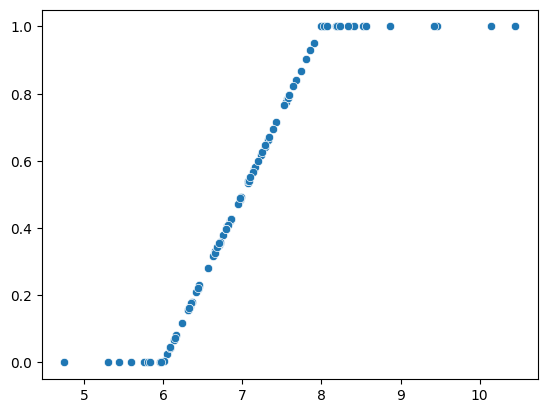

In [51]:
import seaborn as sns

sns.scatterplot(x=raw, y=modified)

In [57]:
from drugex.training.scorers.modifiers import SmoothClippedScore

sascore_scorer.setModifier(SmoothClippedScore(lower_x=4, upper_x=2))
raw = sascore_scorer.getScores([Chem.MolFromSmiles(smile) for smile in sample])
modified = sascore_scorer([Chem.MolFromSmiles(smile) for smile in sample])

<Axes: >

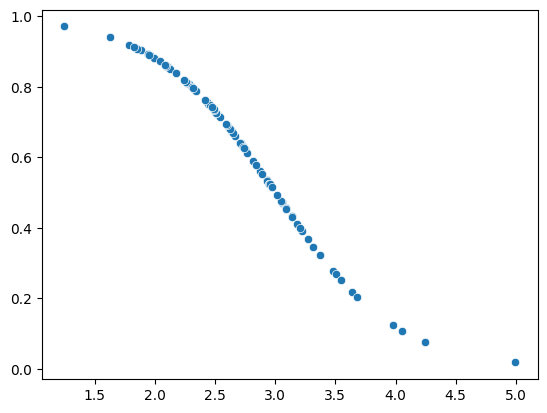

In [58]:
import seaborn as sns

sns.scatterplot(x=raw, y=modified)

In [60]:
from drugex.training.environment import DrugExEnvironment
from drugex.training.rewards import ParetoCrowdingDistance

scorers = [
    qsprpred_scorer,
    sascore_scorer
]
thresholds = [
    0.5,
    0.1
]

environment = DrugExEnvironment(scorers, thresholds, reward_scheme=ParetoCrowdingDistance())

In [61]:
scores = environment.getScores(sample)
scores

,Valid,QSPRpred_P08908_LIGANDS_nostereo_XGBRegressor,SA,Desired
0,1.0,0.025153,0.562309,0
1,1.0,0.618874,0.906569,1
2,1.0,0.169427,0.123861,0
3,1.0,0.662664,0.719966,1
4,1.0,0.117564,0.859691,0
...,...,...,...,...
95,1.0,1.000000,0.735520,1
96,1.0,0.000000,0.912782,0
97,1.0,0.796093,0.741957,1
98,1.0,0.903267,0.859141,1


In [63]:
environment.getUnmodifiedScores(sample)

,QSPRpred_P08908_LIGANDS_nostereo_XGBRegressor,SA
0,6.050305,2.874731
1,7.237748,1.863780
2,6.338855,3.978180
3,7.325328,2.527854
4,6.235128,2.093638
...,...,...
95,8.238067,2.488593
96,5.440721,1.825955
97,7.592185,2.471917
98,7.806534,2.095912


In [78]:
from drugex.training.explorers import SequenceExplorer
import warnings
warnings.filterwarnings('ignore')

MODEL_DIR_RL = "./data/models/RL/rnn"

pretrained = SequenceRNN(voc, is_lstm=True)
pretrained.loadStatesFromFile(f'{MODELS_PR_PATH}/Papyrus05.5_smiles_rnn_PT.pkg')

finetuned = SequenceRNN(voc, is_lstm=True)
finetuned.loadStatesFromFile(f'{MODEL_DIR}/P08908_finetuned.pkg')

explorer = SequenceExplorer(
    agent = pretrained,
    env = environment,
    mutate = finetuned, # network introducing "random mutations" to the generated structures (rate determined by epsilon)
    epsilon = 0.4,
)

monitor = FileMonitor(os.path.join(MODEL_DIR_RL, 'P08908_reinforced'), save_smiles=True, reset_directory=True)
explorer.fit(monitor=monitor, epochs=30)

Fitting SMILES RNN explorer:   0%|          | 0/30 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating policy gradient...:   0%|          | 0/8 [00:00<?, ?it/s]

In [79]:
df_info = pd.read_csv(f'{MODEL_DIR_RL}/P08908_reinforced_fit.tsv', sep='\t')
df_info.head()

,Epoch,valid_ratio,unique_ratio,desired_ratio,avg_amean,avg_gmean,loss_train,best_epoch
0,1,0.93,0.93,0.17,0.445,0.324,0.105,1
1,2,0.95,0.95,0.25,0.494,0.377,0.097,2
2,3,0.91,0.91,0.25,0.535,0.427,0.093,2
3,4,0.89,0.89,0.25,0.530,0.437,0.080,2
4,5,0.80,0.80,0.20,0.530,0.421,0.074,2


<Axes: >

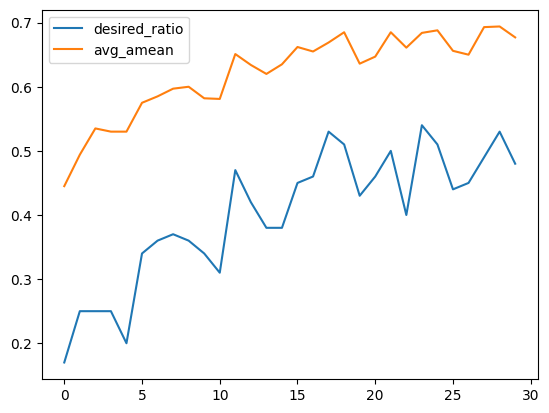

In [80]:
df_info[['desired_ratio', 'avg_amean']].plot.line()

In [81]:
agent = SequenceRNN(voc, is_lstm=True)
agent.loadStatesFromFile(f'{MODEL_DIR_RL}/P08908_reinforced.pkg')
generated = agent.generate(num_samples=1000, evaluator=environment)
generated

Generating molecules:   0%|          | 0/1000 [00:00<?, ?it/s]

,SMILES,Valid,Desired,QSPRpred_P08908_LIGANDS_nostereo_XGBRegressor,SA
0,COc1ccccc1N1CCN(CCCCCC(=O)N2c3ccccc3CC2C)CC1,1.0,1.0,7.964,2.608
1,Cc1cc(C)c(NC(=O)c2ccc(Cl)c(Cl)c2)c(Cl)c1,1.0,0.0,6.277,1.798
2,O=S(=O)(NC1CCN(CCOc2ccccc2-c2ccccc2)CC1)c1cccs1,1.0,0.0,6.648,2.151
3,O=C(CCCCCN1CCN(c2ccccc2)CC1)c1ccc(F)cc1,1.0,1.0,7.678,1.801
4,Clc1ccc(Sc2ccccc2)cc1,1.0,0.0,6.349,1.526
...,...,...,...,...,...
995,CCOC(=O)c1ccc(OCCCN2CCN(c3ccccc3)CC2)cc1,1.0,1.0,7.478,1.769
996,Nc1ccc(C2CCNCC2)cc1,1.0,0.0,6.304,2.012
997,CN1CCN(c2ccccc2NC(=O)c2ccccc2)CC1,1.0,1.0,7.087,1.611
998,COc1ccc(Nc2ccc(CNC(=O)C3CCN(C)CC3)cc2)cc1,1.0,0.0,5.895,1.816


In [124]:
generated["Set"] = "Reinforced"
generated.rename({"QSPRpred_P08908_LIGANDS_nostereo_XGBRegressor": "pchembl_value_Median"}, inplace=True, axis='columns')
df_all_sets = pd.concat([df_all_sets[df_all_sets.Set != "P08908 (reinforced)"], generated])
df_all_sets.Set.unique()

array(['Generated (pretrained)', 'P08908', 'Fine-tuned', 'Reinforced'],
      dtype=object)

In [125]:
mt_general_P08908_ft_rl = MoleculeTable(
    name="Pretrained+P08908+FT+RL", 
    df=df_all_sets.copy()
)
morgan_fp = MorganFP(3, 2048)
mt_general_P08908_ft_rl.addDescriptors([morgan_fp])
plt = Plot(UMAP(n_neighbors=30, min_dist=0.4, metric="jaccard", random_state=42))
plt.plot(
    mt_general_P08908_ft_rl,
    color_by='Set',
    recalculate=True,
    card_data=[
        "Set",
        "pchembl_value_Median",
    ],
    port=9002,
    viewport_height=800
)

Dash is running on http://127.0.0.1:9002/



In [127]:
mt_general_P08908_ft_rl_searched = mt_general_P08908_ft_rl.searchOnProperty("Set", ["Reinforced"])
mt_general_P08908_ft_rl_searched.getProperty("Set").unique()

array(['Reinforced'], dtype=object)

In [128]:
plt.plot(
    mt_general_P08908_ft_rl_searched,
    color_by='pchembl_value_Median',
    recalculate=False,
    card_data=[
        "Set",
        "pchembl_value_Median",
    ],
    port=9003,
    viewport_height=800
)

Dash is running on http://127.0.0.1:9003/

